<a href="https://colab.research.google.com/github/mgkim-developer/INU-Lab/blob/master/ECG_analysis_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
#==========================변수=======================================
loss = 'categorical_crossentropy'# 
optimizer = 'sgd'
metrics = ['accuracy']

seed = 0
fit_bs = 16
fit_epochs = 100
early_stopping_patience = 5
min_delta_value = 0
reapeat_size = 986
test_bs = 32
count_train_sets = 200
count_validation_sets = count_train_sets + 50
test_size = count_validation_sets 
#==========================함수=======================================
def create_model() : #모델을 구성하는 함수
  model =  Sequential()
  model.add(Dense(units=1000,input_dim = 986, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=900, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=850, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=750, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=600, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=400, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=300, activation='relu'))
  model.add(Dense(units=200, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=16, activation='relu'))
  model.add(Dense(units=3, activation='relu'))
  model.add(Dense(units=3, activation='softmax'))
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  return model

def model_graph() : #history를 그래프로 만들어주는 함수
  fig, loss_ax = plt.subplots()

  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuray')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')

  plt.show()

#numpy를 사용하여 csv파일을 array 형태로 불러오기
myFile = np.genfromtxt('/content/drive/My Drive/Colab_Data/heartbeat_datasets.csv', delimiter= ',', skip_header = 1) 
np.random.seed(seed) #랜덤시드 설정(가중치 시작값)
#데이터 슬라이싱 위의 변수 부분에서 조절가능
X_train = myFile[:count_train_sets,1:987]
Y_train = myFile[:count_train_sets,-1]
X_val =  myFile[count_train_sets:count_validation_sets,1:987]
Y_val =  myFile[count_train_sets:count_validation_sets,-1]
X_test = myFile[test_size:,1:987]
Y_test = myFile[test_size:,-1]

#Denselayer에 넣을 수 있게 shape을 변경하고 데이터의 정밀도를 위해 generaliztion 진행 
X_train = X_train.reshape(count_train_sets, 986).astype('float32')/1620.0
X_val = X_val.reshape(count_validation_sets-count_train_sets, 986).astype('float32')/1620.0
X_test = X_test.reshape(20, 986).astype('float32')/1620.0

#샘플의 갯수가 적은 편이므로 랜덤한 난수를 뽑아 datasets에 indexting 하여 새로운 datasets 구성
train_rand_idx = np.random.choice(count_train_sets,reapeat_size)
val_rand_idx = np.random.choice(count_validation_sets-count_train_sets,reapeat_size)
test_rand_idx = np.random.choice(20,reapeat_size)

X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
X_test = X_test[test_rand_idx]
Y_test = Y_test[test_rand_idx]

# 'One-Hot encoding'이라는 기법으로 0,1,2값은 vectorization 한다.
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

#DNN 모델 생성과 ealrystopping을 잡아준다.
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', min_delta = min_delta_value, patience=early_stopping_patience,verbose=0,mode='min')

#histoty에 있는 학습중에 발생한 loss, accuracy, val_loss, val_accuracy를 출력
hist = model.fit(X_train,Y_train, epochs =fit_epochs, batch_size = fit_bs, validation_data = (X_val,Y_val),callbacks=[early_stopping])
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=test_bs)
print('loss : ' , hist.history['loss'])
print('accuray : ' , hist.history['accuracy'])
print('val_loss : ' , hist.history['val_loss'])
print('val_accuracy' , hist.history['val_accuracy'])
print('-----------------------')
print('loss_and_metrics:'+ str(loss_and_metrics))

#그래프를 그려주는 함수
model_graph()

In [0]:
#==========================변수=======================================
loss = 'categorical_crossentropy'# 
optimizer = 'sgd'
metrics = ['accuracy']

seed = 0
fit_bs = 16
fit_epochs = 100
early_stopping_patience = 5
min_delta_value = 0
reapeat_size = 986
test_bs = 32
count_train_sets = 200
count_validation_sets = count_train_sets + 50
test_size = count_validation_sets 

In [0]:
#==========================함수=======================================
def create_model() : #모델을 구성하는 함수
  model =  Sequential()
  model.add(Dense(units=1000,input_dim = 986, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=900, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=850, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=750, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=600, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=400, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=300, activation='relu'))
  model.add(Dense(units=200, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=16, activation='relu'))
  model.add(Dense(units=3, activation='relu'))
  model.add(Dense(units=3, activation='softmax'))
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  return model

def model_graph() : #history를 그래프로 만들어주는 함수
  fig, loss_ax = plt.subplots()

  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuray')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')

  plt.show()

In [0]:
#numpy를 사용하여 csv파일을 array 형태로 불러오기
myFile = np.genfromtxt('/content/drive/My Drive/Colab_Data/heartbeat_datasets.csv', delimiter= ',', skip_header = 1) 
np.random.seed(seed) #랜덤시드 설정(가중치 시작값)
#데이터 슬라이싱 위의 변수 부분에서 조절가능
X_train = myFile[:count_train_sets,1:987]
Y_train = myFile[:count_train_sets,-1]
X_val =  myFile[count_train_sets:count_validation_sets,1:987]
Y_val =  myFile[count_train_sets:count_validation_sets,-1]
X_test = myFile[test_size:,1:987]
Y_test = myFile[test_size:,-1]

In [0]:
#Denselayer에 넣을 수 있게 shape을 변경하고 데이터의 정밀도를 위해 generaliztion 진행 
X_train = X_train.reshape(count_train_sets, 986).astype('float32')/1620.0
X_val = X_val.reshape(count_validation_sets-count_train_sets, 986).astype('float32')/1620.0
X_test = X_test.reshape(20, 986).astype('float32')/1620.0

In [0]:
#샘플의 갯수가 적은 편이므로 랜덤한 난수를 뽑아 datasets에 indexting 하여 새로운 datasets 구성
train_rand_idx = np.random.choice(count_train_sets,reapeat_size)
val_rand_idx = np.random.choice(count_validation_sets-count_train_sets,reapeat_size)
test_rand_idx = np.random.choice(20,reapeat_size)

X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
X_test = X_test[test_rand_idx]
Y_test = Y_test[test_rand_idx]

In [140]:
# 'One-Hot encoding'이라는 기법으로 0,1,2값은 vectorization 한다.
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

ValueError: ignored

In [0]:
#DNN 모델 생성과 ealrystopping을 잡아준다.
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', min_delta = min_delta_value, patience=early_stopping_patience,verbose=0,mode='min')

In [142]:
#histoty에 있는 학습중에 발생한 loss, accuracy, val_loss, val_accuracy를 출력
hist = model.fit(X_train,Y_train, epochs =fit_epochs, batch_size = fit_bs, validation_data = (X_val,Y_val),callbacks=[early_stopping])
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=test_bs)
print('loss : ' , hist.history['loss'])
print('accuray : ' , hist.history['accuracy'])
print('val_loss : ' , hist.history['val_loss'])
print('val_accuracy' , hist.history['val_accuracy'])
print('-----------------------')
print('loss_and_metrics:'+ str(loss_and_metrics))

ValueError: ignored

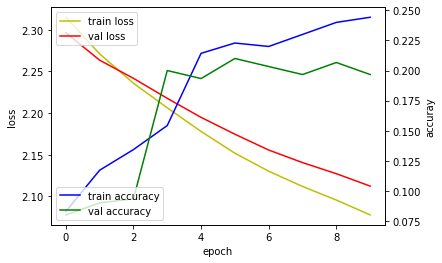

In [143]:
#그래프를 그려주는 함수
model_graph()

for edit


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as K
from keras.models import *
from keras import backend as K
from keras.layers import *
import gc

In [0]:
#load ECG dataset
df = pd.read_csv('/content/drive/My Drive/Colab_Data/heartbeat_datasets.csv',index_col=0,header=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X948,X949,X950,X951,X952,X953,X954,X955,X956,X957,X958,X959,X960,X961,X962,X963,X964,X965,X966,X967,X968,X969,X970,X971,X972,X973,X974,X975,X976,X977,X978,X979,X980,X981,X982,X983,X984,X985,X986,Class
Sample_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,970,970,950,970,960,950,970,950,950,960,950,960,970,960,980,970,980,970,970,980,970,990,970,990,980,980,990,980,980,980,990,970,980,970,950,970,960,950,950,970,...,930,950,950,930,940,950,760,1120,960,930,930,940,930,930,940,930,940,940,920,940,940,940,950,940,960,950,960,960,960,960,960,960,950,950,950,940,950,950,950,Baseline
3,730,760,740,750,750,740,740,740,740,740,740,750,750,750,740,740,730,720,730,730,720,720,720,710,720,700,720,720,720,470,960,720,710,700,690,700,690,700,700,710,...,750,750,760,760,750,760,760,750,760,760,750,760,760,750,760,760,760,560,970,550,320,250,240,210,240,230,230,240,240,230,240,240,240,250,240,230,250,240,240,VT
3,620,940,780,780,790,760,780,770,770,780,760,790,770,790,770,770,780,770,780,760,780,760,770,770,760,780,750,770,760,760,760,750,760,760,750,770,750,760,760,750,...,710,710,700,720,710,720,720,720,730,720,730,720,720,710,710,710,700,720,710,700,710,700,710,710,700,700,690,710,700,710,700,700,710,700,710,710,710,700,700,Baseline
3,920,920,920,910,930,900,920,910,920,900,910,900,910,890,910,890,910,890,910,890,910,880,910,890,890,890,910,880,900,880,890,890,880,880,890,890,900,890,890,910,...,820,840,830,840,840,830,850,840,840,850,840,860,850,850,840,850,850,850,840,860,860,860,860,850,870,660,470,320,290,300,300,300,280,280,280,280,280,280,280,VT
3,870,880,870,890,900,880,900,910,910,910,900,900,900,900,900,900,890,900,900,890,890,900,890,890,900,890,890,900,880,890,900,880,890,890,880,900,890,900,890,890,...,820,840,840,830,840,830,830,840,830,830,840,840,820,840,840,820,840,860,830,840,840,830,830,830,840,830,830,840,840,830,840,850,840,850,850,860,850,850,850,Baseline


In [0]:
X_train, Y_train, X_test, Y_test = df

ValueError: ignored

In [0]:
X_val = X_train[986:]
Y_val = Y_train[986:]
X_train = X_train[:986]
Y_train = Y_train[:986]

In [0]:
X_train = X_train.reshape(200, 986).astype
X_val = X_val.reshape(70, 986).astype
X_test = X_test.reshape(70, 986).astype

ValueError: ignored

In [0]:
train_rand_idxs = np.random.choice(200, 986)
val_rand_idxs = np.random.choice(70, 986)

In [0]:
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

IndexError: ignored

모델 학습 과정 표시하기

NameError: ignored

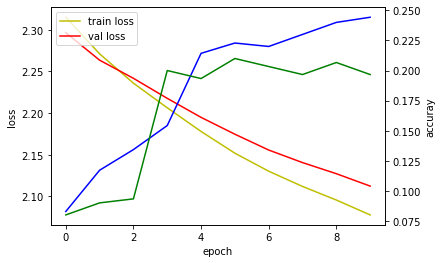

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
accuracy_ax.legend(loc='lower left')

plt.show()